In [1]:
import pandas as pd
import numpy as np

In [2]:
#Import and store the data in a data frame

air = pd.read_csv('http://www.stat.ufl.edu/~winner/data/airq402.dat', header=None, sep='\s+', engine='python')

air.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [3]:
air.columns = ['City1', 'City2', 'AverageFare1','Distance','Averageweeklypassengers','marketleadingairline','marketshare1','Averagefare2','Lowpriceairline','marketshare2','price']

air.head()

,City1,City2,AverageFare1,Distance,Averageweeklypassengers,marketleadingairline,marketshare1,Averagefare2,Lowpriceairline,marketshare2,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [4]:
air.dtypes

City1                       object
City2                       object
AverageFare1               float64
Distance                     int64
Averageweeklypassengers    float64
marketleadingairline        object
marketshare1               float64
Averagefare2               float64
Lowpriceairline             object
marketshare2               float64
price                      float64
dtype: object

In [5]:
air.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City1,1000,90,ATL,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City2,1000,85,TPA,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageFare1,1000,NaN,NaN,NaN,163.375,55.3655,50.52,125.975,161.345,197.392,401.23
Distance,1000,NaN,NaN,NaN,1056.97,643.203,108,553.5,919,1452.5,2724
Averageweeklypassengers,1000,NaN,NaN,NaN,672.279,766.519,181.41,257.197,404.78,769.912,8950.76
marketleadingairline,1000,16,WN,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marketshare1,1000,NaN,NaN,NaN,60.1286,19.3678,17.68,46.51,59.24,73.51,100
Averagefare2,1000,NaN,NaN,NaN,166.648,62.6601,50.52,124.085,161.4,202.977,490.03
Lowpriceairline,1000,19,WN,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marketshare2,1000,NaN,NaN,NaN,34.5515,27.097,1.06,13.195,26.14,52.9725,100


In [6]:
#Remove the outliers from the data

#Using IQR logic to remove outliers

#Writing a function to get min and max values acceptable for outlier calculation 

def MinLevel(x,df):
    IQR = (df[x].quantile(0.75)-df[x].quantile(0.25))
    Min = df[x].quantile(0.25) - 1.5*IQR
    return(Min)

def MaxLevel(x,df):
    IQR = (df[x].quantile(0.75)-df[x].quantile(0.25))
    Max = df[x].quantile(0.75) + 1.5*IQR
    return(Max)

In [7]:
air = air[(air.Distance >= MinLevel('Distance',air)) & (air.Distance <= MaxLevel('Distance',air))]
air = air[(air.AverageFare1 >= MinLevel('AverageFare1',air)) & (air.AverageFare1 <= MaxLevel('AverageFare1',air))]
air = air[(air.Averageweeklypassengers >= MinLevel('Averageweeklypassengers',air)) & (air.Averageweeklypassengers <= MaxLevel('Averageweeklypassengers',air))]
air = air[(air.marketshare1 >= MinLevel('marketshare1',air)) & (air.marketshare1 <= MaxLevel('marketshare1',air))]
air = air[(air.Averagefare2 >= MinLevel('Averagefare2',air)) & (air.Averagefare2 <= MaxLevel('Averagefare2',air))]
air = air[(air.marketshare2 >= MinLevel('marketshare2',air)) & (air.marketshare2 <= MaxLevel('marketshare2',air))]
air = air[(air.price >= MinLevel('price',air)) & (air.price <= MaxLevel('price',air))]
air.shape

(882, 11)

In [8]:
#Encoding categorical variables

categorical_feature_mask = air.dtypes==object
categorical_cols = air.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
air[categorical_cols] = air[categorical_cols].apply(lambda col: le.fit_transform(col))

In [9]:
air.head()

,City1,City2,AverageFare1,Distance,Averageweeklypassengers,marketleadingairline,marketshare1,Averagefare2,Lowpriceairline,marketshare2,price
0,16,0,114.47,528,424.56,6,70.19,111.03,7,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,5,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,4,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,16,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,16,15.34,145.42


In [10]:
air.corr()

,City1,City2,AverageFare1,Distance,Averageweeklypassengers,marketleadingairline,marketshare1,Averagefare2,Lowpriceairline,marketshare2,price
City1,1.000000,0.313087,-0.091482,0.033843,0.012605,0.041077,-0.069823,-0.110718,0.036493,0.093881,-0.026025
City2,0.313087,1.000000,-0.031569,0.149010,-0.036961,-0.011534,-0.080106,-0.042491,0.019373,0.047512,0.034104
AverageFare1,-0.091482,-0.031569,1.000000,0.515907,-0.196499,-0.319303,-0.204179,0.980099,-0.167712,-0.497634,0.837588
Distance,0.033843,0.149010,0.515907,1.000000,-0.128814,-0.135328,-0.546456,0.483723,-0.185201,-0.362699,0.532505
Averageweeklypassengers,0.012605,-0.036961,-0.196499,-0.128814,1.000000,-0.025421,0.021585,-0.162571,0.073053,0.075825,-0.209042
marketleadingairline,0.041077,-0.011534,-0.319303,-0.135328,-0.025421,1.000000,0.102807,-0.299148,0.267516,0.160506,-0.296294
marketshare1,-0.069823,-0.080106,-0.204179,-0.546456,0.021585,0.102807,1.000000,-0.190391,0.140436,0.281636,-0.311463
Averagefare2,-0.110718,-0.042491,0.980099,0.483723,-0.162571,-0.299148,-0.190391,1.000000,-0.155829,-0.521553,0.791496
Lowpriceairline,0.036493,0.019373,-0.167712,-0.185201,0.073053,0.267516,0.140436,-0.155829,1.000000,0.201555,-0.214975
marketshare2,0.093881,0.047512,-0.497634,-0.362699,0.075825,0.160506,0.281636,-0.521553,0.201555,1.000000,-0.262850


In [11]:
#Dropping City1 and City2 because they have very less correlation with DV

air = air.drop(['City1', 'City2'], axis=1)

In [12]:
import seaborn as sns

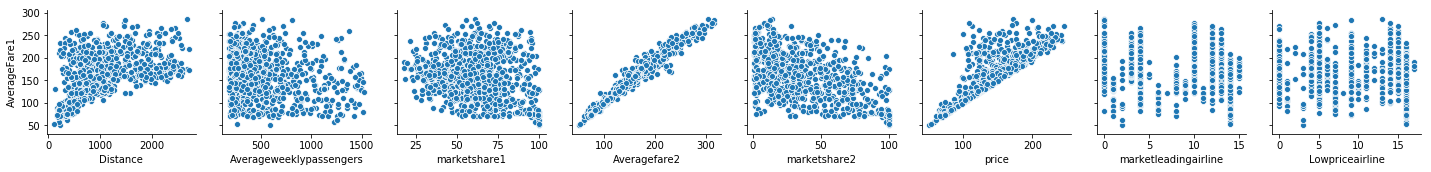

In [13]:
pp = sns.pairplot(data=air,
                  y_vars=['AverageFare1'],
                  x_vars=['Distance', 'Averageweeklypassengers', 'marketshare1', 'Averagefare2','marketshare2','price','marketleadingairline','Lowpriceairline'])

In [14]:
Y = air['AverageFare1']
Y.shape

(882,)

In [15]:
X = air.loc[:, air.columns != 'AverageFare1']
X.shape

(882, 8)

In [16]:
#Splitting data into train and test. Splitting in 70:30 ratio.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [17]:
print('X Train',X_train.shape,'\n','X Test',X_test.shape,'\n','Y Train',Y_train.shape,'\n','Y Test',Y_test.shape)

X Train (617, 8) 
 X Test (265, 8) 
 Y Train (617,) 
 Y Test (265,)


In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
regressor.coef_

array([ 0.00341777, -0.0040868 , -0.22360389,  0.08536699,  0.73431028,
        0.12637837, -0.04551856,  0.19946523])

In [20]:
#Coefficients of the model

coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Distance,0.003418
1,Averageweeklypassengers,-0.004087
2,marketleadingairline,-0.223604
3,marketshare1,0.085367
4,Averagefare2,0.734310
5,Lowpriceairline,0.126378
6,marketshare2,-0.045519
7,price,0.199465


In [21]:
#Intercept of the model

regressor.intercept_

8.33367807164666

In [22]:
#Accuracy of the model on test set.

regressor.score(X_test, Y_test)

0.9752689303246894